Found 3080 files belonging to 9 classes.
Class names: ['Palm__Black_Scorch', 'Palm__Fusarium_Wilt', 'Palm__Leaf_Spots', 'Palm__Magnesium_Deficiency', 'Palm__Manganese_Deficiency', 'Palm__Parlatoria_Blanchardi', 'Palm__Potassium_Deficiency', 'Palm__Rachis_Blight', 'Palm__healthy']
Total images: 3136
Train count: 2496, Validation count: 256, Test count: 384


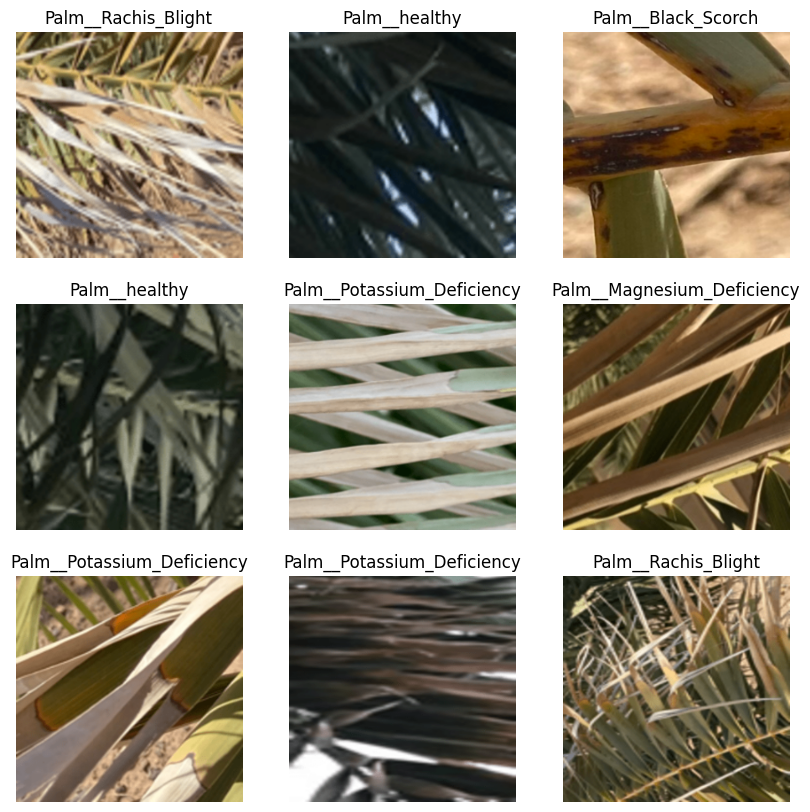

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
%matplotlib inline

IMAGE_SIZE = 256
BATCH_SIZE = 64
CHANNEL = 3
EPOCHS = 100

# تحميل البيانات
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "DATASET",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# الحصول على أسماء الفئات
class_names = dataset.class_names
print("Class names:", class_names)

# حساب عدد الصور في مجموعة البيانات
total_images = len(dataset) * BATCH_SIZE  # العدد الإجمالي للصور
print("Total images:", total_images)

# تقسيم البيانات
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

# تقسيم البيانات
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

# التأكد من عدد الصور في كل مجموعة
print(f'Train count: {len(train_ds) * BATCH_SIZE}, Validation count: {len(val_ds) * BATCH_SIZE}, Test count: {len(test_ds) * BATCH_SIZE}')

# عرض بعض الصور للتحقق من البيانات
plt.figure(figsize=(10, 10))
for image_batch, label_batch in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis(False)


In [ ]:
N_CLASSES = 9

# إعداد النموذج
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
])

# بناء النموذج
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(N_CLASSES, activation='softmax')
])

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNEL))

# تجميع النموذج
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# ملخص النموذج
model.summary()


Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_52 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_53 (Sequential)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_102 (Conv2D)                  │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_102 (MaxPooling2D)     │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_103 (Conv2D)                  │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_103 (MaxPooling2D)     │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_104 (Conv2D)                  │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_104 (MaxPooling2D)     │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,840,137 (56.61 MB)

 Trainable params: 14,840,137 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.2151 - loss: 3.7605 - val_accuracy: 0.3281 - val_loss: 1.7714
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.3494 - loss: 1.8076 - val_accuracy: 0.4219 - val_loss: 1.5642
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4503 - loss: 1.5302 - val_accuracy: 0.4492 - val_loss: 1.5914
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4813 - loss: 1.4239 - val_accuracy: 0.4727 - val_loss: 1.4316
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5124 - loss: 1.3596 - val_accuracy: 0.5156 - val_loss: 1.3943
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5375 - loss: 1.3514 - val_accuracy: 0.5078 - val_loss: 1.3546
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5604 - loss: 1.2695 - val_accuracy: 0.5625 - val_loss: 1.2331
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5576 - loss: 1.2135 - val_accuracy: 0.

In [ ]:
# تقييم النموذج على مجموعة الاختبار
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9603 - loss: 0.1210
Test accuracy: 0.97, Test loss: 0.10


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


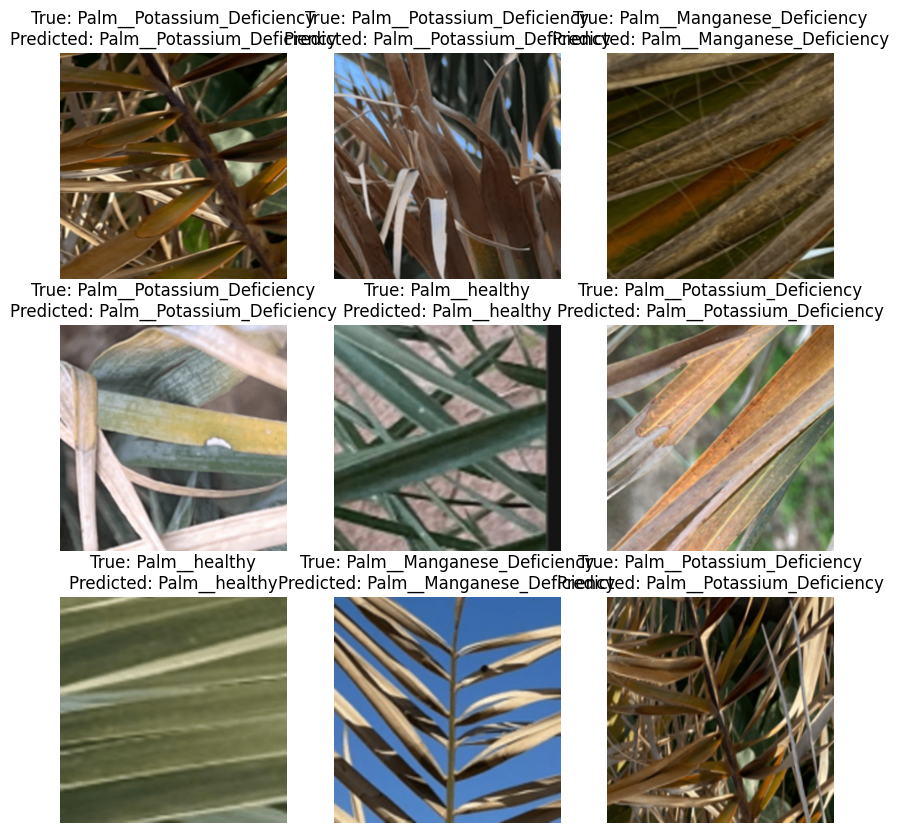

In [ ]:
import numpy as np

# دالة لعرض الصور مع التنبؤات
def display_predictions(ds, class_names):
    plt.figure(figsize=(10, 10))
    for image_batch, label_batch in ds.take(1):
        predictions = model.predict(image_batch)
        predicted_labels = np.argmax(predictions, axis=1)

        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(image_batch[i].numpy().astype('uint8'))
            plt.title(f'True: {class_names[label_batch[i]]}\nPredicted: {class_names[predicted_labels[i]]}')
            plt.axis('off')

# عرض التنبؤات
display_predictions(test_ds, class_names)


In [ ]:
class_names = dataset.class_names
class_names

['Palm__Black_Scorch',
 'Palm__Fusarium_Wilt',
 'Palm__Leaf_Spots',
 'Palm__Magnesium_Deficiency',
 'Palm__Manganese_Deficiency',
 'Palm__Parlatoria_Blanchardi',
 'Palm__Potassium_Deficiency',
 'Palm__Rachis_Blight',
 'Palm__healthy']

In [ ]:


# تحويل النموذج إلى TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# حفظ النموذج المحول إلى ملف .tflite
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("تم حفظ النموذج  ")


In [ ]:
ls

In [ ]:
model.save('model.keras')


In [ ]:
ls

In [ ]:
from google.colab import files

# رفع الملف إلى جهازك
files.download('model.tflite')

In [ ]:
files.download('model.keras')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy}')

In [ ]:
print(class_names)
print(N_CLASSES)


In [ ]:
model.save('palm_pulse_disease_model.keras')


In [ ]:
ls

In [ ]:
files.download('palm_pulse_disease_model.keras')

In [ ]:
files.download('palm_pulse_disease_model.h5')